<span style="color:#0808D6"><center> <h1> <font size="5"> DATA3406 Mini-Assignment 08 - 480377616  </font> </h1></center></span> 

<center> Group 4 - COVID 19 Analysis </center>

***
<div style="background-color:#054afa;">
<span style="color:#ffb908"><center> <h1> Part 1 of Mini-Assignment </h1></center></span> 

**What I learnt from the *Intro to Pandas* notebook**:

- The relationship between DataFrames and Series, where DataFrames can be considered as just a collection of Series.
- That DataFrames can be made through a Python dictionary that maps a key (variables) to particular values (data entries)
- That NumPy operations can be applied across an entire series - this can be helpful if log-transformations or other manipulations are needed for data visualiation in Assignment 2
- That NumPy transformations can also be filtered to only apply for values in Series that fulfill a certain condition (condition is represented through lambda value). This can also be helpful if we want to only filter out death/case numbers for example that exceed a certain pre-defined threshold

**What I learnt from the *Charts* notebook**:

- The construction of stack plots and pie charts using `matplotlib`. However, I do not think I will use these graphs as there are probably better alternatives for more transparent visualisations (e.g. line graph over stack plot and barplot over pie chart).

- How subplotting works using `subplot2grid`. This can be really useful if we want a side-by-side comparison of different variables that may have different scales from each other over a certain independent variable (e.g. death rate, government stringency index over time).

- How to make 3D Graphs. However, I do not think I will be utilising 3D graphs much in Assignment 2 since they can be difficult to interpret, involving multiple dimensions.

- How to make interactive plots! I though this was really useful since interactive plots can make the data more transparent for users who might want to inspect different areas of the plot or examine particular data points.

***
<div style="background-color:#054afa;">
<span style="color:#ffb908"><center> <h1> Part 2 of Mini-Assignment </h1></center></span> 

<div style="background-color:#EFEEDF;">
<span style="color:maroon"><center> <h1> 1. Introduction and Background Information </h1></center></span> 

## 1.1 Description of the Dataset

The dataset that will be explored contains an extensive summary of COVID-19 data (e.g. cases, deaths, and testing) across the world. It is managed by the online publisher *Our World in Data*, which updates their COVID-19 dataset on a **daily basis**. They collect their data predominantly from the *European Center for Disease Prevention and Control* (ECDC)

For this Mini-Assignment, I will be focusing on the trends and patterns prevalent in **Germany**. After exploring some of their statistics in mangaging the COVID-19 situation, I will then compare Germany's response to China's response (the location of the first outbreak) and Australia's response to COVID-19.

***
<div style="background-color:#EFEEDF;">
<span style="color:maroon"><center> <h1> 2. Data Reading and Cleaning </h1></center></span>

## 2.1 Reading the Data

Firstly, we will import our necessary libraries and then read in our .CSV file.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#Reading .CSV file
df = pd.read_csv("owid-covid-data.csv")

In [3]:
#Taking a glimpse of some of the data
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


There appears to be many columns/variables in this DataFrame. Let's try to inspect all of them at once.

In [4]:
#Creating a list of all the column names
#list(df.columns)

## 2.2 Cleaning the Data

On first inspection, it appears that the dataset from OWID has already been cleaned. That is, all missing numerical values are represented as `NaN`,which is appropriate compared to other cleaning methods (e.g. replacing missing data with 0 or `None` objects).

However, we will just double check that there is no missing data relating to qualitative values (e.g. `iso_code`).

In [5]:
#Column names
cols = df.columns

#First, collect index of numerical columns
num_cols = df._get_numeric_data().columns

#Now, subtract the column index with indices of numerical columns for qualitative
list(set(cols) - set(num_cols))

['iso_code', 'continent', 'date', 'tests_units', 'location']

There seems to be only five variables that are categorical in nature. Hence, we will check whether these columns have any missing values.

In [6]:
df_qual = df[['iso_code', 'continent', 'location', 'date', 'tests_units']]
df_qual[df_qual.isna().any(axis = 1)].tail()

,iso_code,continent,location,date,tests_units
50085,NaN,NaN,International,2020-10-10,NaN
50086,NaN,NaN,International,2020-10-11,NaN
50087,NaN,NaN,International,2020-10-12,NaN
50088,NaN,NaN,International,2020-10-13,NaN
50089,NaN,NaN,International,2020-10-14,NaN


As shown above, there are certain places without an associated country/area. As this information can be rather uninformative if we are doing a country analysis, we will remove rows which contain `NaN` values for `iso_code` or `continent`.

In [7]:
#Removing rows with NaN for iso_code or continent
df_clean = df[df['iso_code'].notna()]
df_clean = df_clean[df_clean['continent'].notna()]
df_clean.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
49507,ZWE,Africa,Zimbabwe,2020-10-10,7994.0,43.0,19.429,229.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49508,ZWE,Africa,Zimbabwe,2020-10-11,8010.0,16.0,17.857,230.0,1.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49509,ZWE,Africa,Zimbabwe,2020-10-12,8011.0,1.0,18.000,230.0,0.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49510,ZWE,Africa,Zimbabwe,2020-10-13,8021.0,10.0,17.571,230.0,0.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49511,ZWE,Africa,Zimbabwe,2020-10-14,8036.0,15.0,17.286,230.0,0.0,0.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


Our data is now cleaned and ready for analysis.

***
<div style="background-color:#EFEEDF;">
<span style="color:maroon"><center> <h1> 3. Data Analysis </h1></center></span>

## 3.1 Exploration of Trends in Germany

### 3.1.1 Filtering for only data in Germany

Our country of interest for this particular dataset is Germany. Hence, we will start by filtering only for data recorded in Germany.

In [8]:
warnings.filterwarnings('ignore')

#Filtering for Germany
df_germany = df_clean[df['location'].str.contains("Germany")]
df_germany.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11700,DEU,Europe,Germany,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11701,DEU,Europe,Germany,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11702,DEU,Europe,Germany,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11703,DEU,Europe,Germany,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936
11704,DEU,Europe,Germany,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.936


### 3.1.2 Total case number over time

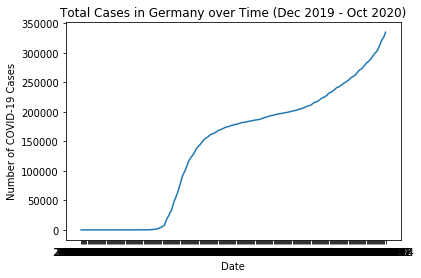

In [9]:
warnings.filterwarnings("ignore")

sns.lineplot(   x = "date",
                y = "total_cases",
                data = df_germany)

plt.title("Total Cases in Germany over Time (Dec 2019 - Oct 2020)")
plt.xlabel("Date")
plt.ylabel("Number of COVID-19 Cases")
plt.show()


Due to the large number of days between December 2019 to October 2020, the *x*-axis labels appear very overcrowded. Nonetheless, we can take note of several observations:

- The first-wave of COVID-19 cases in Germany resulted in it's steepest climb in COVID-19 cases. 

- The rate seemed to have significantly decreased afterwards, but more recently, it appears as if the number of total cases is rising much quicker, which could possibly be considered almost as a 'second-wave' that possibly some countries are experiencing.

- There does not appear to be any plateauing effect yet experienced by Germany, as there appears to be consistent increase since the initial spike in cases with no stabilised period.

In particular, the sudden spike, followed by a shallower rise then steep spike again suggests that the number of new cases in Germany showed an increasing trend, decreasing trend, and then another increasing trend recently.

### 3.1.3 New case numbers of time

Let's continue our analysis (extending from last paragraph in 3.1.2) by investigating the number of new cases over time in Germany.

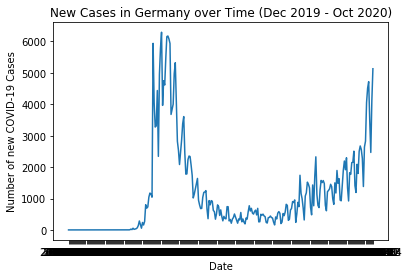

In [10]:
warnings.filterwarnings("ignore")

sns.lineplot(   x = "date",
                y = "new_cases",
                data = df_germany)

plt.title("New Cases in Germany over Time (Dec 2019 - Oct 2020)")
plt.xlabel("Date")
plt.ylabel("Number of new COVID-19 Cases")
plt.show()


As seen, the number of new cases after the initial spike seemed to decrease, although the number of new cases is appearing to rise steadily at an increasing rate recently.

This then makes us wonder whether this pattern in new case numbers are influenced by the German government response (e.g. school closures, lockdowns etc.)

As such, we will now compare new case numbers of COVID-19 in Germany over time simultaneously with their `Government Response Strigency` over time in Germany.

### 3.1.4 New Cases and Governmenet Response Strigency over time

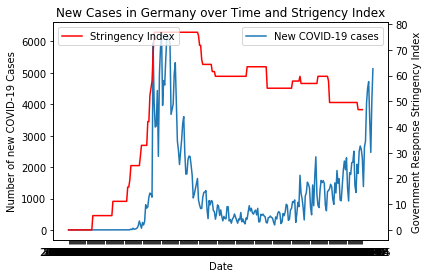

In [11]:
warnings.filterwarnings("ignore")

#Creating lineplot of newcases
ax = sns.lineplot(   x = "date",
                y = "new_cases",
                data = df_germany,
                 legend = False)

plt.xlabel("Date")
plt.ylabel("Number of new COVID-19 Cases")

ax2 = ax.twinx()

#Creating lineplot of Government Stringency Index
sns.lineplot(   x = "date",
                y = "stringency_index",
                data = df_germany,
                legend = False,
            color = 'r')

plt.title("New Cases in Germany over Time and Strigency Index")
plt.ylabel("Government Response Stringency Index")
ax.legend(['New COVID-19 cases'])
ax2.legend(['Stringency Index'], loc = "upper left")
plt.show()

As stated from the OWID Codebook, the Government Response Stringency Index is a "composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)" 

As seen from the graph above, it appears that Germany's response to social lockdowns became very strict after the 'first-wave' climb in case numbers. As such, this could explain the drastic reduction in new cases that follows. However, as the strigency of social lockdowns in Germany became more lenient over time, the number of new cases start to rise rapidly again.

However, it is also possible that the decline in new case numbers may be attributed in a decline in COVID-19 testing. As such, we will also explore the number of new tests done and see if it can explain the number of new cases in Germany.

### 3.1.5 Number of new cases and number of new tests over time

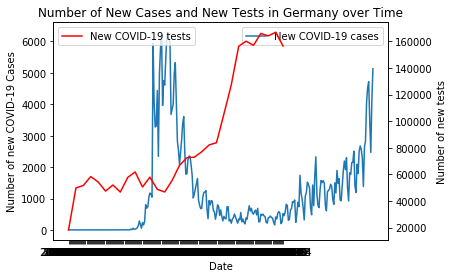

In [12]:
warnings.filterwarnings("ignore")

#Creating lineplot of newcases
ax = sns.lineplot(   x = "date",
                y = "new_cases",
                data = df_germany, legend = False)

plt.xlabel("Date")
plt.ylabel("Number of new COVID-19 Cases")

ax2 = ax.twinx()

#Creating lineplot of Government Stringency Index
sns.lineplot(   x = "date",
                y = "new_tests_smoothed",
                data = df_germany, legend = False,
            color = 'r')

plt.title("Number of New Cases and New Tests in Germany over Time")
plt.ylabel("Number of new tests")
ax.legend(['New COVID-19 cases'])
ax2.legend(['New COVID-19 tests'])
plt.show()

Note that the `new_tests` in Germany completely consisted of `NaN` values. This is probably because Germany does not report daily test numbers (unlike countries such as Australia), but instead rather reports rolling 7-day averages. Hence, the `new_tests_smoothed` variable was used.

It is interesting to note that test-numbers were significantly higher after the first-initial 'wave' (peak). With such high number of testing after the first 'wave', it is most likely that the decline in new case numbers is due to Government Response Stringency rather than testing numbers.

## 3.2 Comparison of Germany to China and Australia

After an individual analysis of Germany's response to COVID-19, it would be interesting to compare how it has handled the pandemic compared to Australia, as well as China.

First, we will need to create additional DataFrames that only contain China and Australia.

In [13]:
#Filtering for Australia
df_aus = df_clean[df['location'].str.contains("Australia")]

#Filtering for China
df_china = df_clean[df['location'].str.contains("China")]

### 3.2.1 Total case numbers of time (per million)

First, we'll have a look at the total number of cases over time across these countries. We will use the total confirmed cases of COVID-19 per 1,000,000 people to account for the different populations of each country.

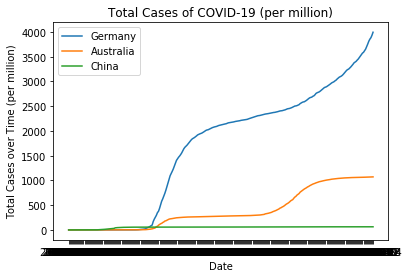

In [14]:
plt.plot(df_germany['date'], df_germany['total_cases_per_million'], label="Germany")
plt.plot(df_aus['date'], df_aus['total_cases_per_million'], label="Australia")
plt.plot(df_china['date'], df_china['total_cases_per_million'], label="China")
plt.plot()

plt.xlabel("Date")
plt.ylabel("Total Cases over Time (per million)")
plt.title("Total Cases of COVID-19 (per million)")
plt.legend()
plt.show()

From the graph above, we can see that Germany has had the highest density of COVID-19 cases compared to Australia and China across a significant time period.

Interestingly, China's total cases over time (per million) is smaller than Australia, of which has mostly been lauded for its handling of the COVID-19 within its country. This could be attributed to China's very large population and the spread of COVID-19 mostly restricted to areas around the Wuhan region (location of first outbreak).

For Australia, it can be seen that there are two rather steep climb in total case numbers. The first steep climb can be attributed to the first 'wave' of the virus in Australia, which predominantly affected NSW. However, the second climb can be associated to the second 'wave' of the virus, which predominantly affected Victoria.

Overall, it is rather interesting to see the large discrepancy in case numbers between Germany compared to Australia and China. We will now compare the Stringency Index for these countries to see whether Australia or China had greater restrictions than Germany.

### 3.2.2 Government Response Stringency Index

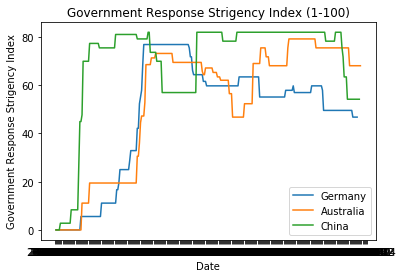

In [15]:
plt.plot(df_germany['date'], df_germany['stringency_index'], label="Germany")
plt.plot(df_aus['date'], df_aus['stringency_index'], label="Australia")
plt.plot(df_china['date'], df_china['stringency_index'], label="China")
plt.plot()

plt.xlabel("Date")
plt.ylabel("Government Response Strigency Index")
plt.title("Government Response Strigency Index (1-100)")
plt.legend()
plt.show()

Interestingly, prior to the second steep rise in cases in Germany (second 'wave'), its Strigency Index is rather comparable to Australia and China on first glance.

As such, this could possibly mean that Government restrictions were not as effective in containing the spread of COVID-19. Reasons could be spread from neighbouring countries in Europe or perhaps breaches in regulations by the public.

### 3.2.3 New Deaths (per million)

Let's now compare the number of new deaths (per million) between the countries, which can give insight into disease management strategies of the countries, or potentially different population demographics (since older people are likely to be more vulnerable to the disease).

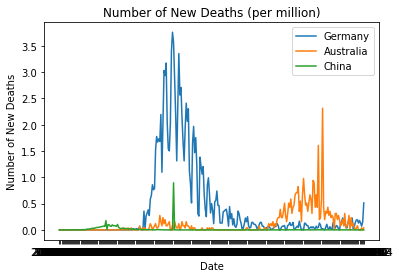

In [16]:
plt.plot(df_germany['date'], df_germany['new_deaths_per_million'], label="Germany")
plt.plot(df_aus['date'], df_aus['new_deaths_per_million'], label="Australia")
plt.plot(df_china['date'], df_china['new_deaths_per_million'], label="China")
plt.plot()

plt.xlabel("Date")
plt.ylabel("Number of New Deaths")
plt.title("Number of New Deaths (per million)")
plt.legend()
plt.show()

From the graph above, it can be seen that Germany had a huge number of new deaths within its first 'wave' of cases. This was probably the case since hospitals would have been overloaded and would have had to adapt to a sunddenly changing situation. However, upon the second 'wave' of cases, the healthcare system would probably be more adapted and can control the mortality rate of the disease.

However, interestingly, Australia's death rate for COVID-19 increased dramatically upon the second 'wave' that primarily affected Victoria. This could probably be explained through how the second 'wave' in Victoria primarily affected aged-care facilities, containing eldery residents that are very vulnerable to the disease.

<span style="color:#0808D6"><center> <h1> <font size="5"> End of Notebook  </font> </h1></center></span> 
***